In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

20210618 기후관련데이터와 해운대 방문객 예시
--

기상자료개방포털

https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do?pgmNo=179

공공데이터포털(해운대해수욕장 방문객 현황)

https://www.data.go.kr/data/15037510/fileData.do


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

haeundae=pd.read_csv('부산광역시_해운대구_해운대해수욕장 방문객 현황_20201019.csv', encoding='CP949',  parse_dates=['방문일'], thousands=',')
temperature=pd.read_csv('temp.csv', encoding='CP949', parse_dates=['날짜'])
rain=pd.read_csv('rain.csv', encoding='CP949', parse_dates=['날짜'])
water=pd.read_csv('water.csv', encoding='CP949', parse_dates=['일시'])
sun=pd.read_csv('sun.csv', encoding='CP949', parse_dates=['일시'])
wind=pd.read_csv('wind.csv', encoding='CP949', parse_dates=['일시'])

In [ ]:
haeundae=pd.DataFrame(haeundae)
temperature=pd.DataFrame(temperature)
rain=pd.DataFrame(rain)
water=pd.DataFrame(water)
sun=pd.DataFrame(sun)
wind=pd.DataFrame(wind)

In [ ]:
rain=rain.fillna(0)
rain

,날짜,강수량(mm)
0,2020-06-01,0.0
1,2020-06-02,0.0
2,2020-06-03,0.0
3,2020-06-04,0.0
4,2020-06-05,0.0
...,...,...
87,2020-08-27,27.4
88,2020-08-28,17.6
89,2020-08-29,3.1
90,2020-08-30,0.0


In [ ]:
water.drop(['\t\t지점번호'], axis=1, inplace=True)
water=water.dropna()

In [ ]:
sun.drop(['\t\t지점번호'], axis=1, inplace=True)
sun=sun.dropna()

In [ ]:
wind.drop(['\t\t지점번호'], axis=1, inplace=True)
wind=wind.dropna()

In [ ]:
rain=rain.fillna(0)
rain

,날짜,강수량(mm)
0,2020-06-01,0.0
1,2020-06-02,0.0
2,2020-06-03,0.0
3,2020-06-04,0.0
4,2020-06-05,0.0
...,...,...
87,2020-08-27,27.4
88,2020-08-28,17.6
89,2020-08-29,3.1
90,2020-08-30,0.0


In [ ]:
haeundae.drop(['관리구군명','관리기관명'], axis=1, inplace=True)

In [ ]:
haeundae['날짜']=haeundae['방문일']
haeundae.drop(['방문일'], axis=1, inplace=True)
haeundae=haeundae[['날짜','연번','방문객수(명)']]

In [ ]:
wind['날짜']=wind['일시']
wind['최대순간풍속시각']=wind['\t최대순간풍속시각']
wind['최대풍속시각']=wind['\t최대풍속시각']
wind.drop(['일시','\t최대순간풍속시각','\t최대풍속시각'], axis=1, inplace=True)
wind=wind[['지점명','날짜','평균풍속(m/s)','최대풍속(m/s)','최대풍속풍향(deg)','최대풍속시각','최대순간풍속(m/s)','최대순간풍속풍향(deg)','최대순간풍속시각']]

In [ ]:
water['날짜']=water['일시']
water.drop(['일시'], axis=1, inplace=True)
water=water[['지점명','날짜','평균습도(%rh)','최저습도(%rh)']]

In [ ]:
sun['날짜']=sun['일시']
sun.drop(['일시'], axis=1, inplace=True)
sun=sun[['지점명','날짜','일조합','일조율','일사합']]

In [ ]:
temp_1=temperature.drop(['지점'], axis=1)
rain_1=rain.drop(['날짜'], axis=1)
water_1=water.drop(['날짜','지점명'], axis=1)
sun_1=sun.drop(['날짜','지점명'], axis=1)
wind_1=wind.drop(['날짜','지점명'], axis=1)
haeundae_1=haeundae.drop(['날짜','연번'], axis=1)

In [ ]:
weather=pd.concat([temp_1, rain_1, water_1, sun_1, wind_1, haeundae_1], axis=1)
weather

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),평균습도(%rh),최저습도(%rh),일조합,일조율,일사합,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속시각,방문객수(명)
0,2020-06-01,22.0,18.3,25.5,0.0,66.9,40.0,10.6,73.6,25.49,3.6,7.6,200.0,15:18,10.5,180.0,15:16,7843
1,2020-06-02,21.1,18.0,25.1,0.0,50.8,32.0,11.8,81.9,29.95,3.7,8.1,230.0,19:26,13.9,250.0,19:25,22450
2,2020-06-03,21.3,18.6,25.7,0.0,81.3,57.0,5.9,41.0,21.46,4.6,7.7,250.0,0:04,11.6,250.0,0:50,23454
3,2020-06-04,22.9,20.3,26.6,0.0,78.1,64.0,10.2,70.8,26.55,4.3,6.9,230.0,3:29,10.5,230.0,2:27,23727
4,2020-06-05,22.0,18.4,27.0,0.0,79.6,60.0,11.0,76.4,24.70,2.2,5.5,270.0,0:24,8.9,270.0,0:19,24739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-08-27,26.2,23.4,28.5,27.4,89.4,72.0,0.1,0.8,6.58,4.3,9.6,230.0,3:59,15.1,200.0,3:51,22465
88,2020-08-28,26.9,25.0,31.3,17.6,86.8,68.0,5.0,38.5,19.95,3.0,6.1,230.0,19:12,9.9,180.0,23:01,23900
89,2020-08-29,27.5,24.0,31.4,3.1,83.8,66.0,7.5,57.7,20.74,3.1,8.7,230.0,1:01,14.2,250.0,0:52,24388
90,2020-08-30,28.5,25.7,33.1,0.0,77.6,58.0,9.0,69.2,22.89,2.4,4.1,180.0,11:25,7.6,50.0,22:50,25083


- 일조합 == 일조시간

[Text(0, 0.5, '강수량(mm)'), Text(0.5, 1.0, '기후와 방문객수')]

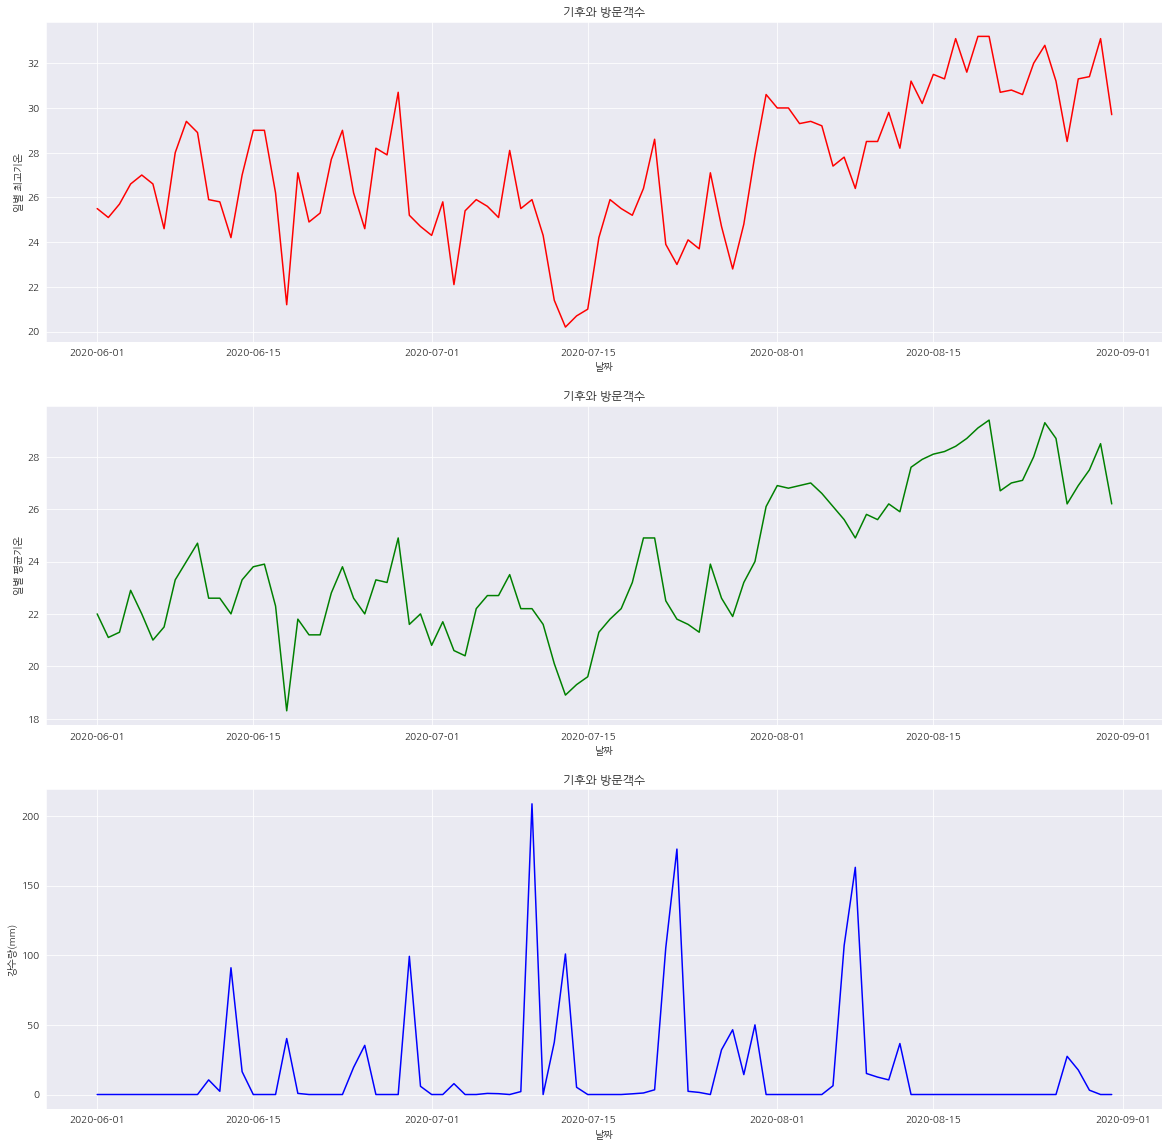

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=weather, x="날짜", y='최고기온(℃)', ax=ax1, color='red')
"\n"
sns.lineplot(data=weather, x="날짜", y="평균기온(℃)", ax=ax2, color='green')
"\n"
sns.lineplot(data=weather, x="날짜", y='강수량(mm)', ax=ax3, color='blue')
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='일별 최고기온', title ="기후와 방문객수")
ax2.set(ylabel='일별 평균기온', title ="기후와 방문객수")
ax3.set(ylabel='강수량(mm)', title ="기후와 방문객수")

[Text(0, 0.5, '방문객수'), Text(0.5, 1.0, '기후와 방문객수')]

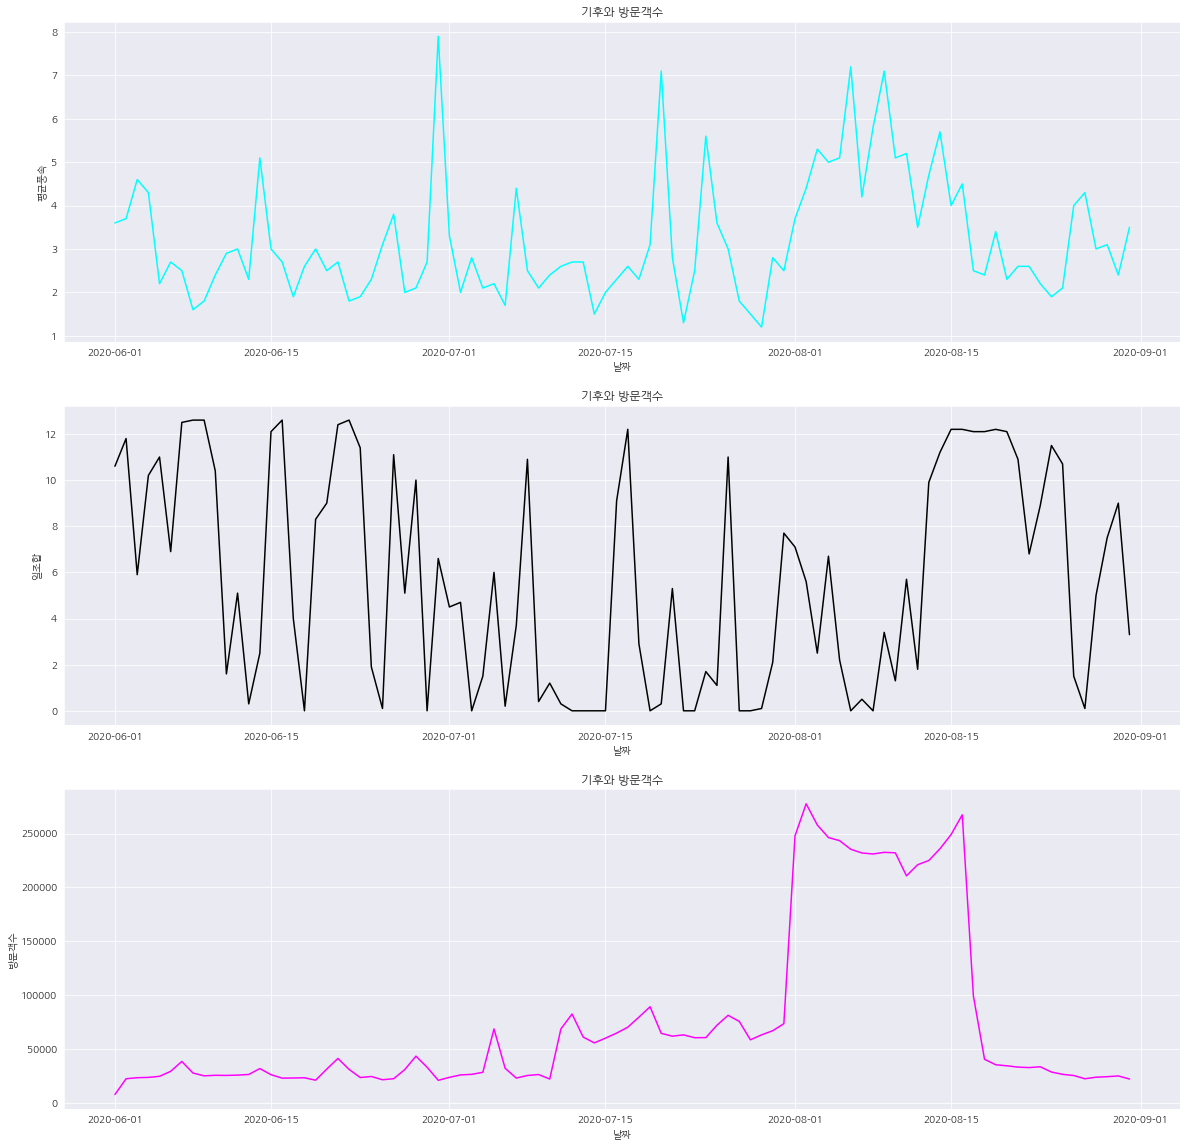

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=weather, x="날짜", y="평균풍속(m/s)", ax=ax1, color='cyan')
"\n"
sns.lineplot(data=weather, x="날짜", y='일조합', ax=ax2, color='black')
"\n"
sns.lineplot(data=weather, x="날짜", y='방문객수(명)', ax=ax3, color='magenta')
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='평균풍속', title ="기후와 방문객수")
ax2.set(ylabel='일조합', title ="기후와 방문객수")
ax3.set(ylabel='방문객수', title ="기후와 방문객수")

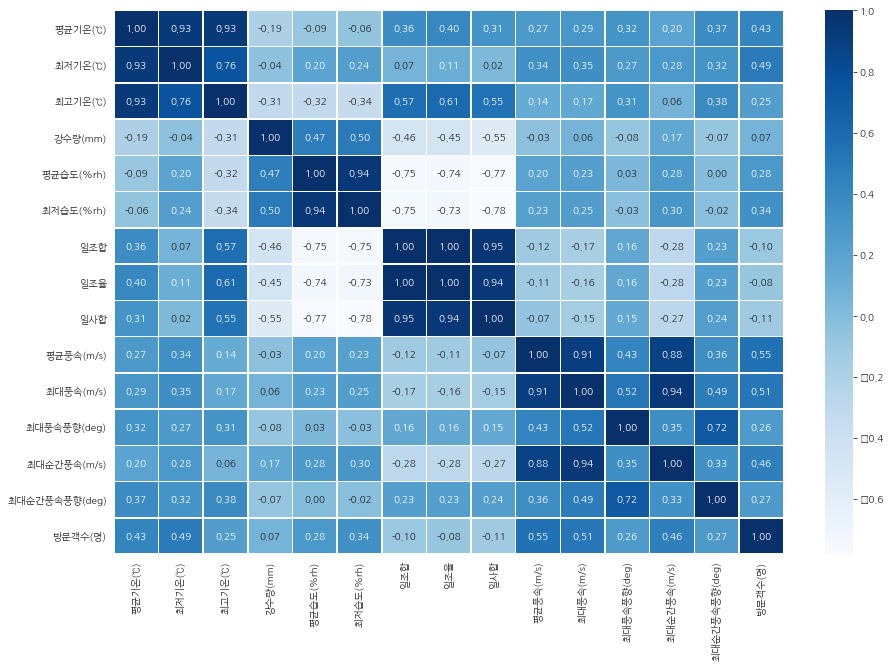

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(15,10))
sns.heatmap(data=weather.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

Regression과 OLS 보기
--

In [ ]:
weather=weather.set_index('날짜', drop=True)
weather

,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),평균습도(%rh),최저습도(%rh),일조합,일조율,일사합,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속시각,방문객수(명)
날짜,,,,,,,,,,,,,,,,,
2020-06-01,22.0,18.3,25.5,0.0,66.9,40.0,10.6,73.6,25.49,3.6,7.6,200.0,15:18,10.5,180.0,15:16,7843
2020-06-02,21.1,18.0,25.1,0.0,50.8,32.0,11.8,81.9,29.95,3.7,8.1,230.0,19:26,13.9,250.0,19:25,22450
2020-06-03,21.3,18.6,25.7,0.0,81.3,57.0,5.9,41.0,21.46,4.6,7.7,250.0,0:04,11.6,250.0,0:50,23454
2020-06-04,22.9,20.3,26.6,0.0,78.1,64.0,10.2,70.8,26.55,4.3,6.9,230.0,3:29,10.5,230.0,2:27,23727
2020-06-05,22.0,18.4,27.0,0.0,79.6,60.0,11.0,76.4,24.70,2.2,5.5,270.0,0:24,8.9,270.0,0:19,24739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,26.2,23.4,28.5,27.4,89.4,72.0,0.1,0.8,6.58,4.3,9.6,230.0,3:59,15.1,200.0,3:51,22465
2020-08-28,26.9,25.0,31.3,17.6,86.8,68.0,5.0,38.5,19.95,3.0,6.1,230.0,19:12,9.9,180.0,23:01,23900
2020-08-29,27.5,24.0,31.4,3.1,83.8,66.0,7.5,57.7,20.74,3.1,8.7,230.0,1:01,14.2,250.0,0:52,24388


In [ ]:
weather_1=weather[['최고기온(℃)','최저습도(%rh)',"평균기온(℃)",'평균습도(%rh)','강수량(mm)',"평균풍속(m/s)",'일조합','방문객수(명)']]
weather_1

,최고기온(℃),최저습도(%rh),평균기온(℃),평균습도(%rh),강수량(mm),평균풍속(m/s),일조합,방문객수(명)
날짜,,,,,,,,
2020-06-01,25.5,40.0,22.0,66.9,0.0,3.6,10.6,7843
2020-06-02,25.1,32.0,21.1,50.8,0.0,3.7,11.8,22450
2020-06-03,25.7,57.0,21.3,81.3,0.0,4.6,5.9,23454
2020-06-04,26.6,64.0,22.9,78.1,0.0,4.3,10.2,23727
2020-06-05,27.0,60.0,22.0,79.6,0.0,2.2,11.0,24739
...,...,...,...,...,...,...,...,...
2020-08-27,28.5,72.0,26.2,89.4,27.4,4.3,0.1,22465
2020-08-28,31.3,68.0,26.9,86.8,17.6,3.0,5.0,23900
2020-08-29,31.4,66.0,27.5,83.8,3.1,3.1,7.5,24388



회귀분석과 통계 살펴보기
--


step 1) TCI 공식에 해당하는 변수만 부여해보기

관광기후지수 공식

TCI = 2(4Cd + Ca + 2P + W + 2S)

Cd: 최고기온, 최저상대습도

Ca: 평균기온, 평균상대습도

P: 총강수량

W: 풍속(m/s)

S: 일조시간 == 일조합 

원래 논문에서는 월별 변수로 넣지만 여기서는 일별로 부여

In [ ]:
x=weather_1.drop(['방문객수(명)'], axis=1)
y=weather_1[['방문객수(명)']]

마지막 3일을 테스트 데이터로 부여

In [ ]:
train=weather_1.iloc[:-3, :]
test=weather_1.iloc[-3:, :]

In [ ]:
x_train=train.drop(['방문객수(명)'], axis=1)
y_train=train[['방문객수(명)']]

In [ ]:
x_test=test.drop(['방문객수(명)'], axis=1)
y_test=test[['방문객수(명)']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import numpy as np
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 56399.16166780035 입니다.
r2 는 0.49 입니다.
train 스코어는 0.49449094173799935 입니다.


In [ ]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 73966.890635602 입니다.
r2 점수는 -3718.15 입니다.
test 스코어는 -3718.154952089126 입니다.


In [ ]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                방문객수(명)   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     10.91
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.02e-09
Time:                        15:45:18   Log-Likelihood:                -1137.8
No. Observations:                  92   AIC:                             2292.
Df Residuals:                      84   BIC:                             2312.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.411e+05   9.38e+04     -2.569      0.012   -4.28e+05   -5.45e+04
최고기온(℃)    -1.367e+04   9459.601     -1.445      0.152   -3.25e+04    5139.777
최저습도(%rh)   1371.8942   1629.646      0.842      0.402   -1868.836    4612.625
평균기온(℃)     2.275e+04   9975.139      2.281      0.025    2913.795    4.26e+04
평균습도(%rh)   -355.7167   1834.481     -0.194      0.847   -4003.783    3292.350
강수량(mm)       44.5335    188.474      0.236      0.814    -330.268     419.336
평균풍속(m/s)   2.149e+04   4929.458      4.359      0.000    1.17e+04    3.13e+04
일조합         2251.3172   2459.848      0.915      0.363   -2640.360    7142.994
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.115
Skew:                           0.062   Prob(JB):                        0.944
Kurtosis:                       3.122   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

모든 변수를 부여하고 Regression 진행
--

- 최대순간풍속시각 제외

In [ ]:
weather_2=weather.drop(['최대순간풍속시각','최대풍속시각'], axis=1)

In [ ]:
weather_2

,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),평균습도(%rh),최저습도(%rh),일조합,일조율,일사합,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대순간풍속(m/s),최대순간풍속풍향(deg),방문객수(명)
날짜,,,,,,,,,,,,,,,
2020-06-01,22.0,18.3,25.5,0.0,66.9,40.0,10.6,73.6,25.49,3.6,7.6,200.0,10.5,180.0,7843
2020-06-02,21.1,18.0,25.1,0.0,50.8,32.0,11.8,81.9,29.95,3.7,8.1,230.0,13.9,250.0,22450
2020-06-03,21.3,18.6,25.7,0.0,81.3,57.0,5.9,41.0,21.46,4.6,7.7,250.0,11.6,250.0,23454
2020-06-04,22.9,20.3,26.6,0.0,78.1,64.0,10.2,70.8,26.55,4.3,6.9,230.0,10.5,230.0,23727
2020-06-05,22.0,18.4,27.0,0.0,79.6,60.0,11.0,76.4,24.70,2.2,5.5,270.0,8.9,270.0,24739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,26.2,23.4,28.5,27.4,89.4,72.0,0.1,0.8,6.58,4.3,9.6,230.0,15.1,200.0,22465
2020-08-28,26.9,25.0,31.3,17.6,86.8,68.0,5.0,38.5,19.95,3.0,6.1,230.0,9.9,180.0,23900
2020-08-29,27.5,24.0,31.4,3.1,83.8,66.0,7.5,57.7,20.74,3.1,8.7,230.0,14.2,250.0,24388


In [ ]:
x=weather_2.drop(['방문객수(명)'], axis=1)
y=weather_2[
            ['방문객수(명)']]

In [ ]:
train=weather_2.iloc[:-3, :]
test=weather_2.iloc[-3:, :]

In [ ]:
x_train=train.drop(['방문객수(명)'], axis=1)
y_train=train[['방문객수(명)']]

In [ ]:
x_test=test.drop(['방문객수(명)'], axis=1)
y_test=test[['방문객수(명)']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 54413.916175381215 입니다.
r2 는 0.53 입니다.
train 스코어는 0.5294523470501094 입니다.


In [ ]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 57475.516883465796 입니다.
r2 점수는 -2244.62 입니다.
test 스코어는 -2244.615095234719 입니다.


In [ ]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                방문객수(명)   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     6.030
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           7.54e-08
Time:                        15:51:32   Log-Likelihood:                -1133.5
No. Observations:                  92   AIC:                             2297.
Df Residuals:                      77   BIC:                             2335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -4.3e+05   1.42e+05     -3.029      0.003   -7.13e+05   -1.47e+05
평균기온(℃)        5.079e+04   1.81e+04      2.803      0.006    1.47e+04    8.69e+04
최저기온(℃)       -1.748e+04   1.23e+04     -1.421      0.159    -4.2e+04    7016.579
최고기온(℃)        -1.75e+04   1.09e+04     -1.611      0.111   -3.91e+04    4129.534
강수량(mm)           9.3522    210.167      0.044      0.965    -409.144     427.848
평균습도(%rh)       102.0155   1977.279      0.052      0.959   -3835.251    4039.282
최저습도(%rh)      1681.8175   1721.629      0.977      0.332   -1746.383    5110.018
일조합            8.139e+04   4.17e+04      1.951      0.055   -1662.716    1.64e+05
일조율           -1.095e+04   5582.466     -1.961      0.053   -2.21e+04     168.117
일사합           -2324.5218   3342.406     -0.695      0.489   -8980.103    4331.059
평균풍속(m/s)      3.396e+04   1.37e+04      2.483      0.015    6720.551    6.12e+04
최대풍속(m/s)     -5228.9569   1.17e+04     -0.449      0.655   -2.84e+04     1.8e+04
최대풍속풍향(deg)     -40.9910    148.128     -0.277      0.783    -335.952     253.971
최대순간풍속(m/s)   -2894.4960   6810.712     -0.425      0.672   -1.65e+04    1.07e+04
최대순간풍속풍향(deg)    47.3680    116.951      0.405      0.687    -185.512     280.248
==============================================================================
Omnibus:                        0.809   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.344
Skew:                          -0.035   Prob(JB):                        0.842
Kurtosis:                       3.291   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared는 결정 계수를 의미하며, 추정한 선형 모형이 주어진 자료에 얼마나 적합한지 보는 척도이다. 

Adj.R-squared는 자유도를 고려하여 수정한 결정계수를 의미한다.F-statistic은 회귀모형에 대한 유의미성 검증 결과를 나타낸다. 

유의미함 (p < 0.05)가령 선형회귀식이 y=a+bx 라고 했을 때,coef는 각 a,b와 관련된 정보를 알 수 있다.

(계수의 추정치)const는 회귀 절편인 a이며,아래 정보들은 회귀의 기울기인 b라고 할 수 있다.aic, bic는 로그 우도를 독립변수의 수로 보정한 값으로 작을 수록 좋다.

P(>|t|)는 모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률을 나타낸다.보통 0.05 이하이면 유의미하다고 볼 수 있다.